# **SSCS - Training**

Developed by André Paiva

Based on SSCS Dataset created by Helena Cuesta and Emilia Gómez

## 1 - Initialization

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, Reduction
import sscs

2023-06-25 19:42:46.428387: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7630] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-06-25 19:42:46.428482: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-06-25 19:42:46.428505: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1500] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-25 19:42:46.437313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 19:42:50,858	INFO worker.py:1636 -- Sta

## 2 - Download and extract dataset SSCS

In [2]:
sscs.download()

SSCS Dataset found.
SSCS Dataset already extracted.
Done.


## 3 - Training VoasCNN

In [3]:
ds_train = sscs.get_dataset(split='train', end_index=1000)

ds_val = sscs.get_dataset(split='validate', end_index=300)

ds_test = sscs.get_dataset(split='test', end_index=300)

2023-06-25 19:42:52.534608: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:953] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 19:42:52.540420: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:953] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 19:42:52.540474: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:953] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 19:42:52.543428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:953] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 19:42:52.543478: I tensorflow/compile

In [4]:
voas_cnn = sscs.res_voas_cnn_model()
voas_cnn.compile(optimizer=Adam(learning_rate=2e-3),
                 loss=BinaryCrossentropy(reduction=Reduction.SUM_OVER_BATCH_SIZE),
                 metrics=[sscs.f1])

#print(voas_cnn.summary())

sscs.load_weights(voas_cnn)
sscs.train(voas_cnn, ds_train, ds_val)       

## 4 - Playground

2023-06-25 19:42:58.127007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:434] Loaded cuDNN version 8600
2023-06-25 19:42:59.413846: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 4s 4s/step


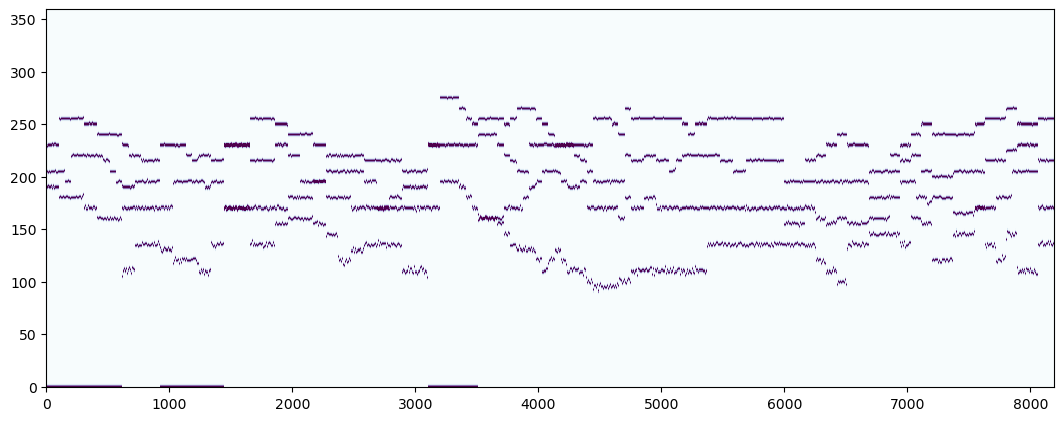

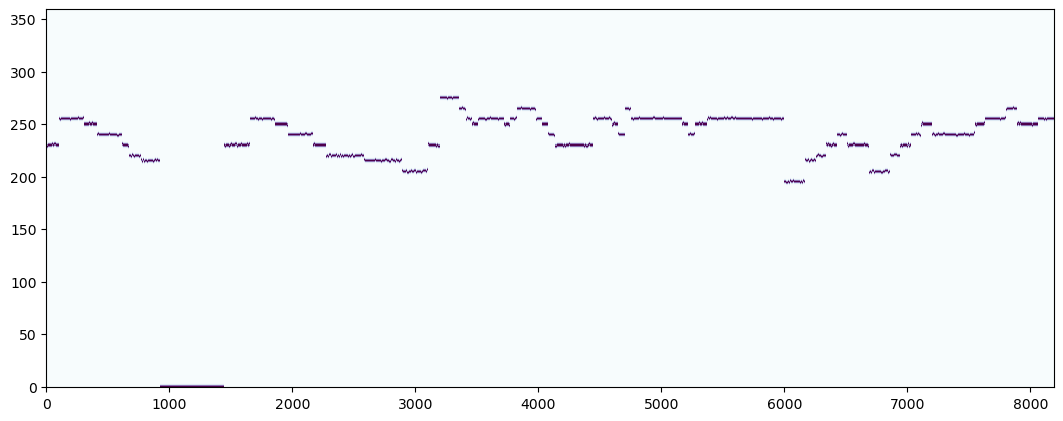

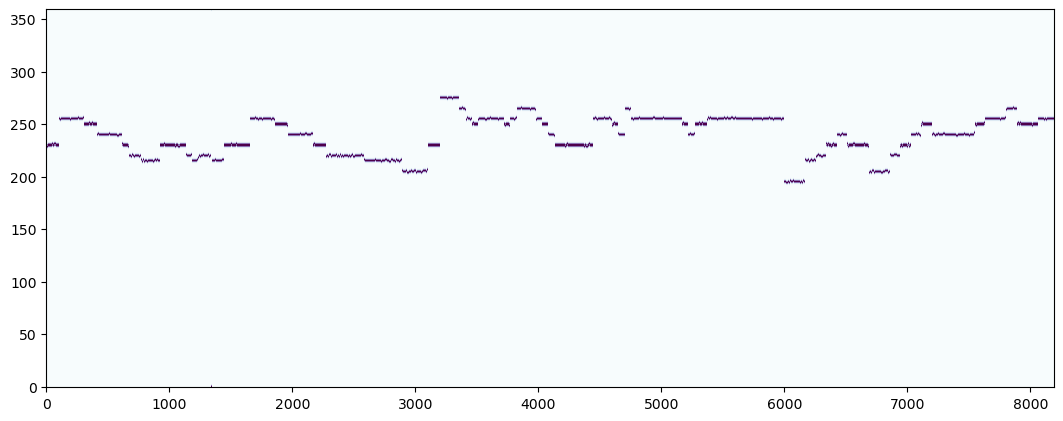

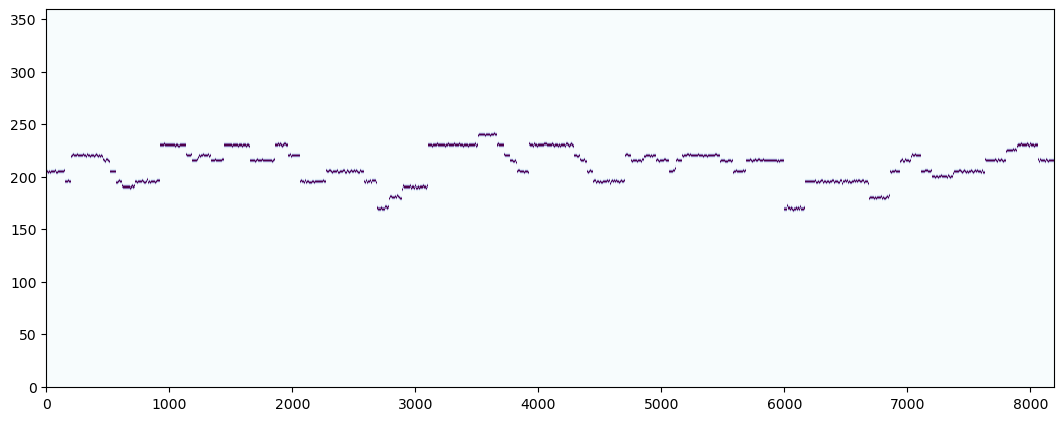

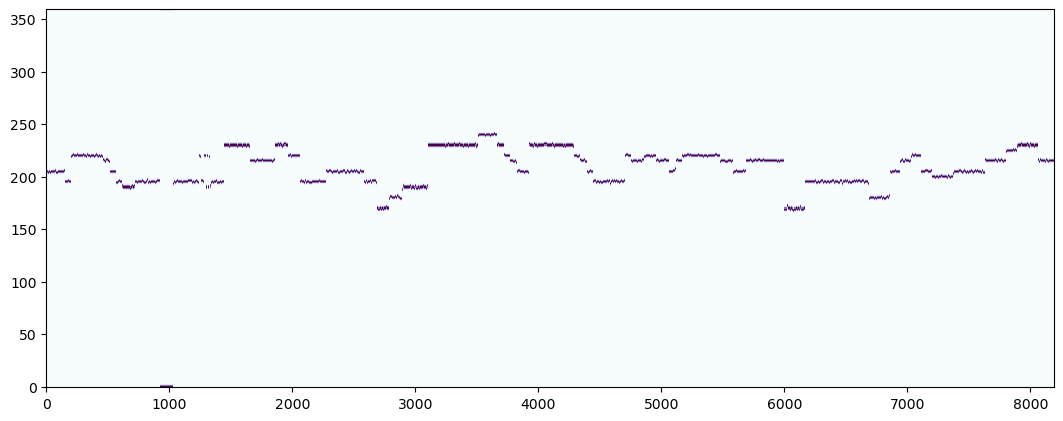

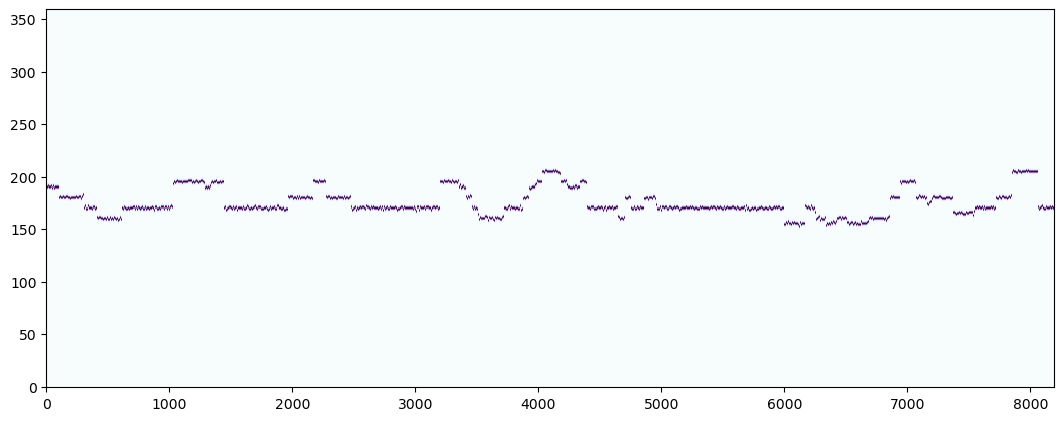

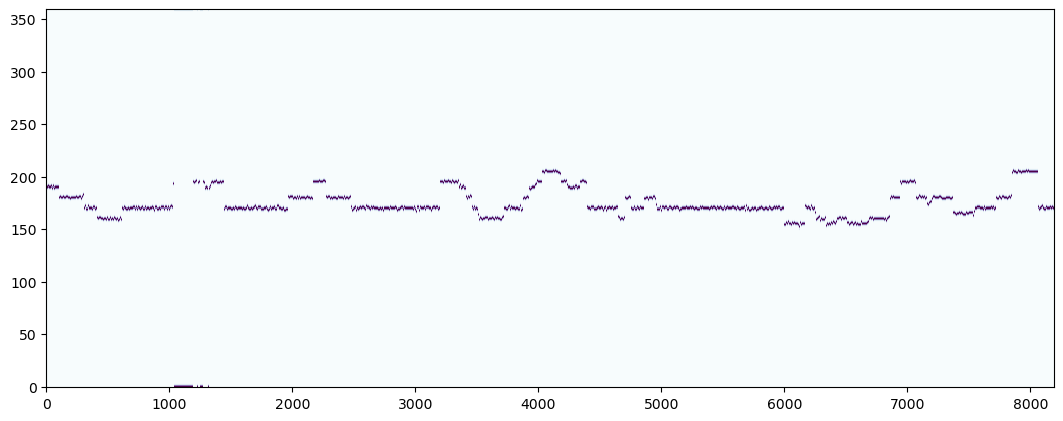

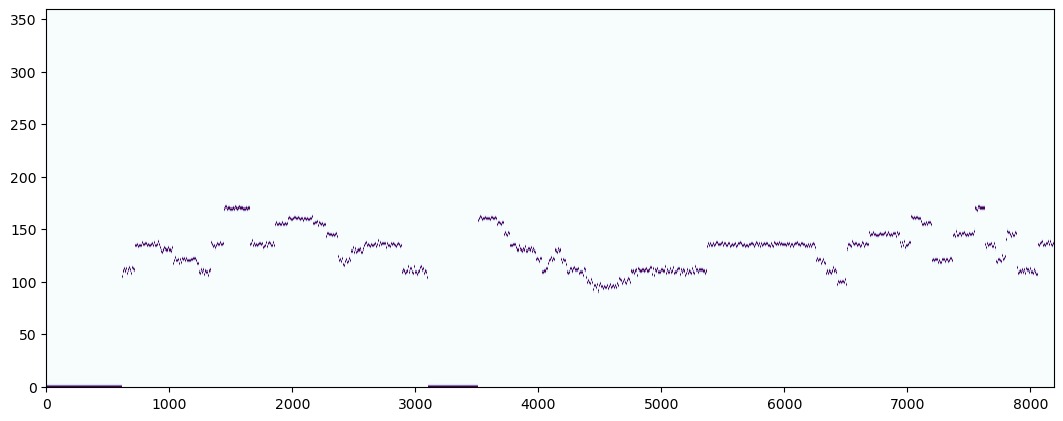

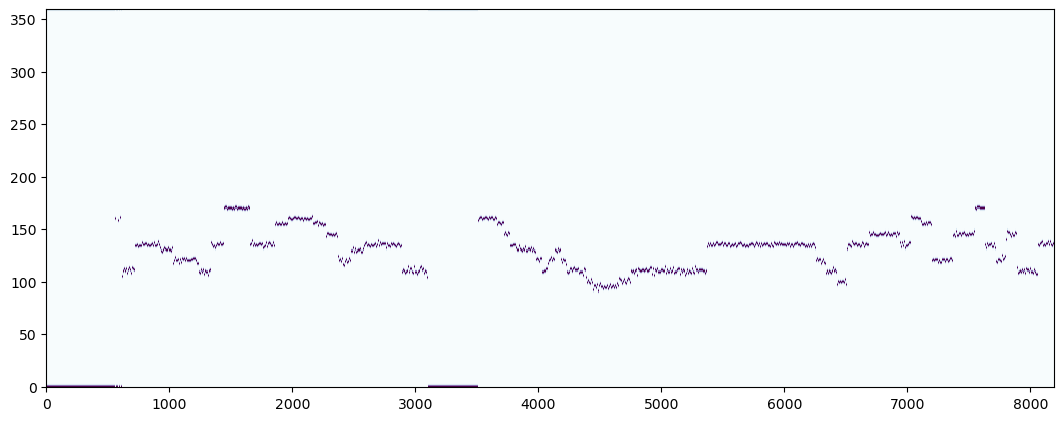

In [5]:
seq_test = sscs.get_sequence(split='test')
mix, satb = seq_test.__getitem__(np.random.randint(0, seq_test.__len__() - 1))

mix = mix.numpy()
s_pred, a_pred, t_pred, b_pred = voas_cnn.predict(mix)

mix = np.moveaxis(mix, 0, 1).reshape(360, -1)
s = np.moveaxis(satb[0].numpy(), 0, 1).reshape(360, -1)
a = np.moveaxis(satb[1].numpy(), 0, 1).reshape(360, -1)
t = np.moveaxis(satb[2].numpy(), 0, 1).reshape(360, -1)
b = np.moveaxis(satb[3].numpy(), 0, 1).reshape(360, -1)

s_pred_postproc = sscs.prediction_postproc(s_pred)
a_pred_postproc = sscs.prediction_postproc(a_pred)
t_pred_postproc = sscs.prediction_postproc(t_pred)
b_pred_postproc = sscs.prediction_postproc(b_pred)

sscs.plot(mix)
sscs.plot(s)
sscs.plot(s_pred_postproc)
#sscs.plot(s_pred)
sscs.plot(a)
sscs.plot(a_pred_postproc)
#sscs.plot(a_pred)
sscs.plot(t)
sscs.plot(t_pred_postproc)
#sscs.plot(t_pred)
sscs.plot(b)
sscs.plot(b_pred_postproc)
#sscs.plot(b_pred)

sscs.song_to_midi(s, a, t, b, './MIDI/original.mid')
sscs.song_to_midi(s_pred_postproc, a_pred_postproc, t_pred_postproc, b_pred_postproc,
                  './MIDI/predicted.mid')